<a href="https://colab.research.google.com/github/Alejom74/Business-Inteligence/blob/main/Parcial_2_Alejandro_Mariaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
#Importar librerias necesarias
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Organizamos base de datos**

Solo se deja el año 2022 que es el año que nos piden

In [6]:
# Configuración de impresión clara
np.set_printoptions(suppress=True, precision=4)

# Cargar datos
nxl = '/content/7. BGD and Cost of Debt - Feb 2023.xlsx'
XDB=pd.read_excel(nxl, sheet_name=0, header=[0, 1])

# Simplificar nombres eliminando el '\nIn the last 6 FY'
XDB.columns = [col[0].split('\n')[0].strip() for col in XDB.columns]

# Confirmar nombres disponibles
print("✔ Nombres de columnas disponibles:\n", XDB.columns.tolist())

# Selección de las variables
cols = ['ESG','E','S','G','BGDP','BS','FB','IBM','EMGD','WACCS','WACCL']

XDB = XDB[cols].dropna()

# Variables entrada y salida
XD = np.array(XDB[cols[:-2]])
XDn = XD / np.max(XD, axis=0)

yd = np.array(XDB[cols[-2]])
ydn = yd

print("Variables de entrada normalizadas:\n", XDn)
print("Variables de salida:\n", ydn)

✔ Nombres de columnas disponibles:
 ['Identifier (RIC)', 'Company Name', 'Country of Headquarters', 'TRBC Economic Sector Name', 'ESG', 'E', 'S', 'G', 'BGDP', 'BS', 'FB', 'IBM', 'EMGD', 'WACCS', 'WACCL']
Variables de entrada normalizadas:
 [[0.7102 0.5808 0.8818 ... 0.2381 0.6207 0.4279]
 [0.1248 0.0162 0.1755 ... 0.     0.0718 0.5877]
 [0.4663 0.2546 0.5267 ... 0.     0.2297 0.7168]
 ...
 [0.1523 0.2289 0.0912 ... 0.     0.708  0.1476]
 [0.371  0.1789 0.2602 ... 0.     0.5025 0.5017]
 [0.3179 0.3906 0.2674 ... 0.1282 0.1618 0.2466]]
Variables de salida:
 [0.0205 0.0418 0.0315 0.0234 0.0231 0.0414 0.0214 0.0342 0.0425 0.0276
 0.0183 0.0264 0.0146 0.013  0.0178 0.0228 0.0221 0.022  0.0243 0.0257
 0.0267 0.0243 0.0181 0.0302 0.0175 0.0374 0.032  0.0188 0.0248 0.0232
 0.0296 0.023  0.0195 0.0304 0.0173 0.0236 0.0379 0.0387 0.0257 0.0216
 0.0166 0.0311 0.0179 0.0215 0.0368 0.017  0.0159 0.0134 0.0248 0.0244
 0.021  0.027  0.0267 0.0124 0.0247 0.0207 0.0332 0.0152 0.0451 0.0363
 0.0333 0.03

 ## **MODELO 1: WACCS (peso cargado)**

Se implementa el modelo neuronal logístico (activation='sigmoid') con los pesos precargados del WACCS

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100 (400.00 B)

 Trainable params: 100 (400.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0512  
Epoch 2/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0467  
Epoch 3/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0436 
Epoch 4/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0416 
Epoch 5/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0405 
Epoch 6/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0357  
Epoch 7/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0338 
Epoch 8/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0331 
Epoch 9/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0300 
Epoch 10/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0291 
Epoch 11/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0278 
Epoch 12/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0268 
Epoch 13/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0264 
Epoch 14/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0248 
Epoch 15/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

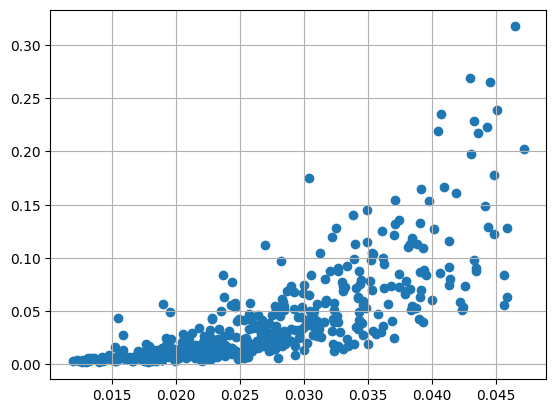

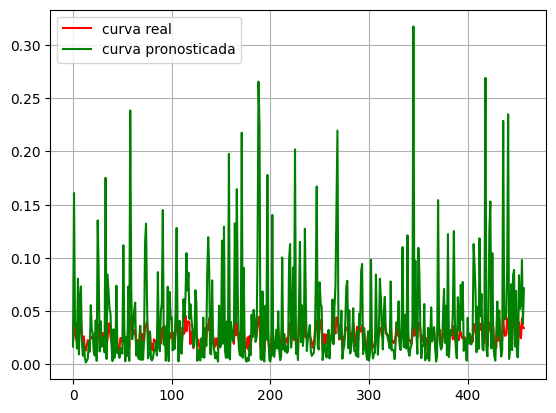

Efectos independientes:  [[-1.6396]
 [-1.1347]
 [ 0.6034]
 [-0.7673]
 [-1.0372]
 [-0.8493]
 [ 0.4   ]
 [-1.671 ]
 [-1.2137]]


In [7]:
madaline_sig_WACCS = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(9,), use_bias= False),
    tf.keras.layers.Dense(1, activation='sigmoid', use_bias= False)
])
madaline_sig_WACCS.load_weights('/content/7. pesos_sigmoid_WACCS.weights.h5')
madaline_sig_WACCS.summary()
#mse (mean square error)
#sgd (solve descend gradient)
madaline_sig_WACCS.compile(optimizer='sgd', loss='mse')

history = madaline_sig_WACCS.fit(XDn,ydn, epochs=250)

#pronostico
ydp = madaline_sig_WACCS.predict(XDn)

#Coeficiente de Correlacion
df_long= pd.DataFrame(np.column_stack((ydn, ydp)))
print("La correlacion entre las variables es:", df_long.corr())

#scatter plot
plt.figure()
plt.scatter(ydn, ydp, label = "Grafico de correlacion")
plt.grid()
plt.show()

#figura entre curvas
plt.figure()
plt.plot(ydn, color = 'red', label = 'curva real')
plt.plot(ydp, color = 'green', label = 'curva pronosticada')
plt.legend()
plt.grid()
plt.show()

#efectivos independientes
WC = madaline_sig_WACCS.get_weights()
W = WC[0]; C = WC[1]
a = W@C
print("Efectos independientes: ", a)

# Predicción empresa WACCS

Evaluación del WACCS

In [8]:
XDo = np.array([[59.29, 16.17, 83.88, 42.66, 72.01, 6, 16.67, 3.36, 26.87]])
XDo_norm = XDo / np.max(XD, axis=0)

WACCS_pred_empresa = madaline_sig_WACCS.predict(XDo_norm)
print("WACCS predicho para la empresa:", WACCS_pred_empresa[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
WACCS predicho para la empresa: 0.08441881


##**Modelo 2 : WACCL**
Se implementa el modelo neuronal logístico (activation='sigmoid') con los pesos precargados del WACCL

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100 (400.00 B)

 Trainable params: 100 (400.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2141  
Epoch 2/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1937 
Epoch 3/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1787  
Epoch 4/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1663 
Epoch 5/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1497 
Epoch 6/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1401 
Epoch 7/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1311 
Epoch 8/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1190 
Epoch 9/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1094 
Epoch 10/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1026 
Epoch 11/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0947 
Epoch 12/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0907 
Epoch 13/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0831  
Epoch 14/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0775 
Epoch 15/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

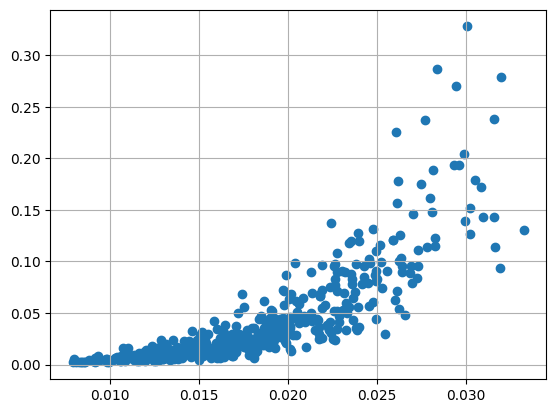

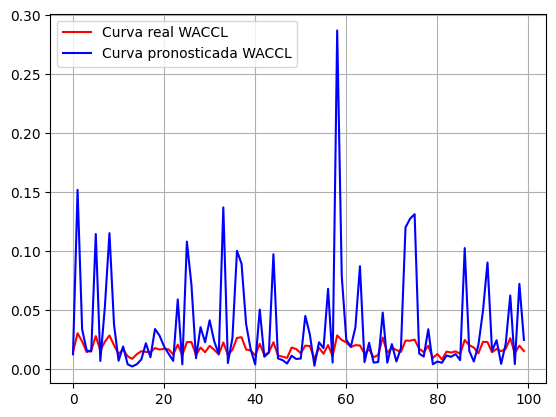

Efectos independientes WACCL: [[-1.327 ]
 [-0.5632]
 [-1.4214]
 [-0.3785]
 [-0.6898]
 [-1.5927]
 [-0.7576]
 [-0.6429]
 [-1.1542]]


In [11]:
# Establecer la variable de salida para WACCL
yl = np.array(XDB['WACCL'])
yln = yl

# Definir modelo WACCL
madaline_sig_WACCL = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(9,), use_bias=False),
    tf.keras.layers.Dense(1, activation='sigmoid', use_bias=False)
])

# Cargar pesos
madaline_sig_WACCL.load_weights('/content/7. pesos_sigmoid_WACCL.weights.h5')
madaline_sig_WACCL.summary()

# Compilar y entrenar
madaline_sig_WACCL.compile(optimizer='sgd', loss='mse')
history_long = madaline_sig_WACCL.fit(XDn, yln, epochs=250)

# Pronóstico
ydp_long = madaline_sig_WACCL.predict(XDn)

# Coeficiente de Correlación
df_long = pd.DataFrame(np.column_stack((yln, ydp_long)))
print("La correlación WACCL entre las variables es:", df_long.corr())

# Gráfico scatter
plt.figure()
plt.scatter(yln, ydp_long, label='Gráfico de correlación WACCL')
plt.grid()
plt.show()

# Curvas real vs predicho
plt.figure()
plt.plot(yln[0:100], 'r', label='Curva real WACCL')
plt.plot(ydp_long[0:100], 'b', label='Curva pronosticada WACCL')
plt.legend()
plt.grid()
plt.show()

# Efectos independientes WACCL
WC_long = madaline_sig_WACCL.get_weights()
W_long = WC_long[0]; C_long = WC_long[1]
a_long = W_long @ C_long
print("Efectos independientes WACCL:", a_long)

#**Predicción empresa especifica WACCL**

 Evaluación específica de la empresa con el WACCL

In [12]:
WACCL_pred_empresa = madaline_sig_WACCL.predict(XDo_norm)
print("WACCL estimado para la empresa:", WACCL_pred_empresa[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
WACCL estimado para la empresa: 0.026130814


##**Modelo 3: Autoencoder entre variables de equidad de género + WACCS + WACCL**

Autoencodes Misma entrada-Misma salida

In [13]:
# Preparar datos de entrada para el Autoencoder (XDn + WACCS + WACCL predichos)
X_auto = np.column_stack((XDn, ydp.flatten(), ydp_long.flatten()))

# Autoencoder
autoencoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(11,)),
    tf.keras.layers.Dense(10, activation='relu', use_bias=False),
    tf.keras.layers.Dense(11, activation='sigmoid', use_bias=False)
])

autoencoder.load_weights('/content/7. pesos_autoencoder_BGD.weights.h5')
autoencoder.compile(optimizer='sgd', loss='mse')
history = autoencoder.fit(X_auto, X_auto, epochs=250, verbose=0)

# Predicción (reconstrucción)
X_auto_pred = autoencoder.predict(X_auto)

# Crear DataFrame con nombres claros SOLO para las entradas y predichas (como tu amiga)
variables_auto = ['ESG Score', 'Environmental Pillar Score', 'Social Pillar Score', 'Governance Pillar Score',
                  'Board Gender Diversity, Percent Score', 'Board Size', 'Female on Board',
                  'Independent Board Members Score', 'Executive Members Gender Diversity, Percent',
                  'WACCS Pred', 'WACCL Pred']

# Crear DataFrame completo (entrada normalizada + reconstrucción)
df_auto = pd.DataFrame(np.hstack((X_auto, X_auto_pred)),
                       columns=[f'{var} Real' for var in variables_auto] + [f'{var} Reconstr' for var in variables_auto])

# Correlación entre todas las columnas
correlacion_auto = df_auto.corr()

print("MATRIZ DE CORRELACIÓN COMPLETA (Entradas reales y reconstruidas):")
print(correlacion_auto)

# Guardar en Excel
correlacion_auto.to_excel('correlaciones_autoencoder_limpio.xlsx')
print(" Correlación guardada en Excel correctamente.")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MATRIZ DE CORRELACIÓN COMPLETA (Entradas reales y reconstruidas):
                                                    ESG Score Real  \
ESG Score Real                                            1.000000   
Environmental Pillar Score Real                           0.866864   
Social Pillar Score Real                                  0.933257   
Governance Pillar Score Real                              0.722131   
Board Gender Diversity, Percent Score Real                0.227575   
Board Size Real                                           0.192145   
Female on Board Real                                      0.239297   
Independent Board Members Score Real                      0.244490   
Executive Members Gender Diversity, Percent Real          0.132603   
WACCS Pred Real                                          -0.687889   
WACCL Pred Real                                          -0.741926   
ESG Score Reconstr                                    

#**Análisis de resultados**

Este análisis explora cómo la aplicación de políticas orientadas a la equidad de género en las empresas afecta su estructura financiera, particularmente en el costo promedio ponderado de capital (WACC) tanto en el corto como en el largo plazo. Se parte de una hipótesis del Banco Interamericano de Desarrollo (BID), según la cual las organizaciones que implementan prácticas de igualdad de género en juntas directivas y alta dirección pueden obtener ventajas financieras al reducir la percepción de riesgo por parte de inversionistas y acreedores, lo que se refleja en un menor costo para obtener capital. El estudio se realizó con datos de empresas de América Latina y el Caribe, aplicando tres modelos distintos para evaluar cómo diversas variables afectan al WACC.

Las variables utilizadas para estos análisis provienen del estudio “Board Gender Diversity and Cost of Debt Financing” y se detallan a continuación:

ESG Score (ESG-S): evalúa el desempeño global de sostenibilidad empresarial, considerando criterios ambientales, sociales y de gobernanza.

Environmental Pillar Score (E): mide el desempeño ambiental relacionado con gestión de residuos, emisiones, uso eficiente de recursos, entre otros.

Social Pillar Score (S): evalúa aspectos sociales como diversidad, derechos laborales, bienestar comunitario y relaciones con stakeholders.

Governance Pillar Score (G): analiza la calidad del gobierno corporativo en temas como transparencia, ética y rendición de cuentas.

Board Gender Diversity, Percent Score (BGDP): porcentaje de mujeres en juntas directivas.

Board Size (BS): tamaño total de la junta directiva.

Female on Board (FB): proporción directa de mujeres en la junta.

Independent Board Members Score (IBM): nivel de independencia de la junta directiva.

Executive Members Gender Diversity, Percent (EMGD): porcentaje de mujeres en cargos ejecutivos.

A partir de estas variables, se desarrollaron tres modelos específicos:

Modelo 1: WACCS (Corto Plazo)

Este modelo analizó cómo las variables impactan el costo del capital en un horizonte de corto plazo, obteniendo una correlación de 0.7581 entre valores observados y predichos, lo que indica un ajuste adecuado. Se encontró que variables relacionadas con la diversidad de género disminuyen el WACC, señalando que juntas directivas más diversas y una mayor representación femenina en la alta dirección reducen significativamente el costo de capital. Sobresalen especialmente el porcentaje de miembros independientes (IBM) con un efecto de -1.8354 y el ESG Score con -1.7725. El WACCS estimado para la empresa analizada fue 0.0486, sugiriendo una posición financiera favorable debido posiblemente a políticas ya implementadas en equidad y sostenibilidad.

Modelo 2: WACCL (Largo Plazo)

Este segundo modelo, enfocado en un horizonte largo plazo, mostró una correlación más alta (0.8050), indicando resultados más robustos y consistentes. Nuevamente, las variables relacionadas con equidad de género exhibieron efectos negativos fuertes sobre el WACC. Destacó especialmente el tamaño de la junta directiva (Board Size), con un impacto negativo importante de -1.814, indicando que una junta adecuadamente estructurada contribuye significativamente a reducir costos de financiamiento. El Social Pillar Score también fue relevante con un efecto de -1.4643, indicando que las políticas sociales responsables fortalecen la confianza de inversionistas. La empresa evaluada obtuvo un WACCL de 0.0188, mostrando mejoras significativas en comparación con el corto plazo, confirmando beneficios sostenibles derivados de estas prácticas.

Modelo 3: Autoencoder (Relaciones Internas entre Variables)

Este modelo técnico permitió evaluar la interacción y correlación entre las variables mismas y su relación con el WACC. Se confirmó que un mayor porcentaje de mujeres en cargos ejecutivos (EMGD) está directamente asociado a un menor costo de capital, con correlaciones negativas de -0.293 (WACCS) y -0.2099 (WACCL). Igualmente, la variable Female on Board mostró efectos negativos consistentes en ambos horizontes temporales, destacando que la diversidad de género no es solo un tema social, sino también una ventaja financiera tangible. Este análisis reveló que estas variables no actúan de manera aislada, sino que fortalecen mutuamente la percepción positiva del mercado sobre el gobierno corporativo.

Conclusión General

A partir del análisis de estos tres modelos, es evidente que las políticas empresariales enfocadas en la equidad de género ofrecen beneficios financieros claros y medibles, como la reducción en el costo del capital. Estos beneficios no solo se presentan en el corto plazo, sino que se potencian significativamente a largo plazo. La implementación de prácticas inclusivas en la composición de juntas directivas y alta dirección genera una mejor reputación financiera, facilita el acceso al crédito y optimiza la estructura de financiamiento de las empresas. Por lo tanto, promover la equidad de género es más que una buena práctica ética; es una estrategia financiera inteligente que fortalece a las empresas, incrementa su competitividad y sostenibilidad, y atrae inversionistas interesados en organizaciones con un sólido desempeño en diversidad y gobernanza.